In [17]:
import warnings
warnings.filterwarnings('ignore')

from GeoAutoViz.urban_morphology.UrbanFeaturesDataSource import UrbanFeaturesDataSource, Mode, Offline
from GeoAutoViz.interfaces.DataSource import Offline
from GeoAutoViz.urban_morphology.UrbanFeaturesVisualizer import UrbanFeaturesVisualizer
from GeoAutoViz.urban_morphology.UrbanFeaturesAnalyzer import UrbanFeaturesAnalyzer

## Initialize objects
Create instances of analyzer, datasource, and visualizer objects. Then link between of them.

In [18]:
datasource = UrbanFeaturesDataSource(place="Soho, London", db_name="Soho")
#datasource = UrbanFeaturesDataSource(place="City of London, London", db_name="city_of_london")
#datasource = UrbanFeaturesDataSource(place="Notting Hill", db_name="notting")

analyzer   = UrbanFeaturesAnalyzer(datasource=datasource)
visualizer = UrbanFeaturesVisualizer(analyzer=analyzer)

## Extract/save input data of urban features from OpenStreetMaps

1- Extract buildings, and streets networkm, with option to save in local storage.
2- Extract from online, or offline sources (Database of files).
3- Save extract in local storage: a) to database, b) to files such as shape files, csv,..etc.

In [19]:
datasource.extract_data(Mode.Online, save_offline=True, mode=Offline.DB)

Extracting buildings...
Saving buildings to the database...
Extracting streets...


/Users/adhamenaya/anaconda3/lib/python3.10/site-packages/momepy/preprocessing.py:218: DeprecationWarning: Accessing the underlying geometries through the `.data` attribute is deprecated and will be removed in GeoPandas 1.0. You can use `np.asarray(..)` or the `to_numpy()` method instead.
Note that if you are using PyGEOS and using this attribute to get an array of PyGEOS geometries, those other methods will always return an array of Shapely geometries. Accessing the underlying PyGEOS geometries directly is deprecated, and you should migrate to use Shapely >= 2.0 instead.
  geom = df.geometry.values.data
/Users/adhamenaya/anaconda3/lib/python3.10/site-packages/geopandas/array.py:1486: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as S-JTSK / Krovak East North (the single non-null crs provided).
  warnings.warn(


Saving streets to the database...
Extracting tessellation...


/Users/adhamenaya/anaconda3/lib/python3.10/site-packages/momepy/elements.py:259: DeprecationWarning: Accessing the underlying geometries through the `.data` attribute is deprecated and will be removed in GeoPandas 1.0. You can use `np.asarray(..)` or the `to_numpy()` method instead.
Note that if you are using PyGEOS and using this attribute to get an array of PyGEOS geometries, those other methods will always return an array of Shapely geometries. Accessing the underlying PyGEOS geometries directly is deprecated, and you should migrate to use Shapely >= 2.0 instead.
  .values.data[0]
/Users/adhamenaya/anaconda3/lib/python3.10/site-packages/momepy/elements.py:278: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  objects.loc[mask, objects.geometry.name] = objects[mask

Saving tessellations to the database...


## Setup analyzer object
-Establish links between buildings, streets, and tessellations.
-Setup spatial weights based on Queen with higher order criterion (=3).

In [20]:
analyzer.setup()
analyzer.setup_neighbors(3)

Merging buildings and streets...
Merging buildings and tessellations...
Setting up neighbors...


## Explore downloaded data

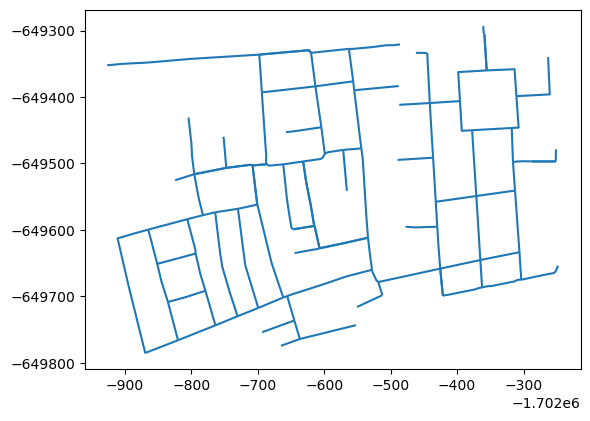

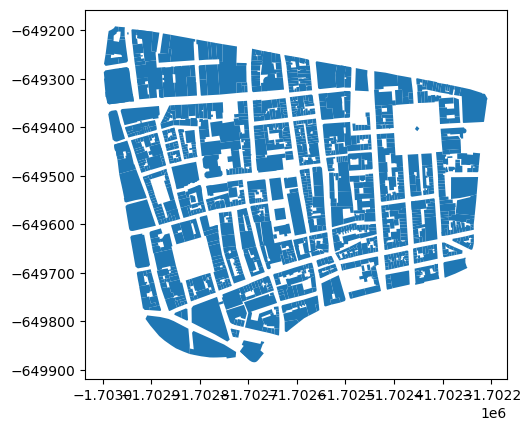

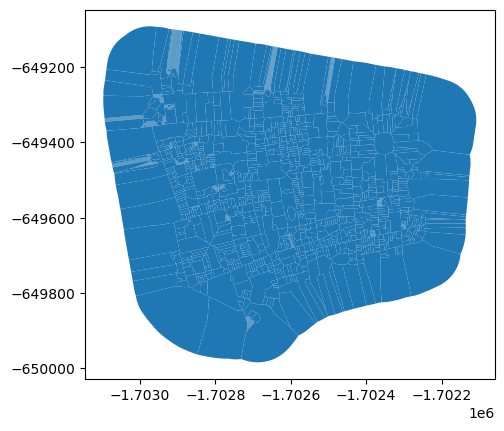

In [21]:
visualizer.plot_streets()
visualizer.plot_buildings()
visualizer.plot_tessellations()

## Measure urban features
### Dimensions

In [22]:
analyzer.compute_buildings_area()
analyzer.compute_tessellation_area()
analyzer.compute_street_length()
#analyzer.compute_street_width()
#analyzer.compute_street_width_deviation()

Computing buildings' area...
Computing tessellation area...
Computing street length...


### Shape

In [23]:
analyzer.compute_building_eri() # Equivalent Rectangle Index
analyzer.compute_building_elongation()
analyzer.compute_building_convexity()
analyzer.compute_streets_linearity()

Computing building's Equivalent Rectangular Index (ERI)...
Computing building's elongation...
Computing building's convexity...
Computing street linearity...


/Users/adhamenaya/anaconda3/lib/python3.10/site-packages/momepy/shape.py:1286: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom.type == "LineString"


### Spatial distribution

In [24]:
analyzer.compute_building_shared_walls()
analyzer.compute_building_adjacency()
analyzer.compute_building_interbuilding_distance()
analyzer.compute_tessellation_covered_area() 
analyzer.compute_tessellation_car()#covered area ratio

Computing building's shared walls ratio...


/Users/adhamenaya/anaconda3/lib/python3.10/site-packages/momepy/distribution.py:135: FutureWarning: The `query_bulk()` method is deprecated and will be removed in GeoPandas 1.0. You can use the `query()` method instead.
  inp, res = gdf.sindex.query_bulk(gdf.geometry, predicate="intersects")


Computing building adjacency...
Computing building's interbuilding distance...
Computing tessellation covered area...
Computing tessellation car ratio...


### Connectivity

In [25]:
analyzer.compute_street_closeness_centrality()

Computing street closeness and meshedness...


  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

### Link and standardize features of buildings, streets, and tessellations
Understand the context of each features by measuring the first, second, and third quartiles withing 3 topological steps (3 ordered neighbours) - if the first, second and  third buildings are the same, there is the homogeneous units.

In [26]:
analyzer.compute_merged_percentiles()
analyzer.compute_standardized_percentiles()

Merging buildings and nodes...


  0%|          | 0/1097 [00:00<?, ?it/s]

Merging all datasets...
Computing merged percentiles...
Computing standardized percentiles...


## Clustering

In [33]:
analyzer.do_urban_type_clustering(6)

Performing clustering with 6 labels...
K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.068 seconds.
K=3 fitted in 0.055 seconds.
K=4 fitted in 0.095 seconds.
K=5 fitted in 0.101 seconds.


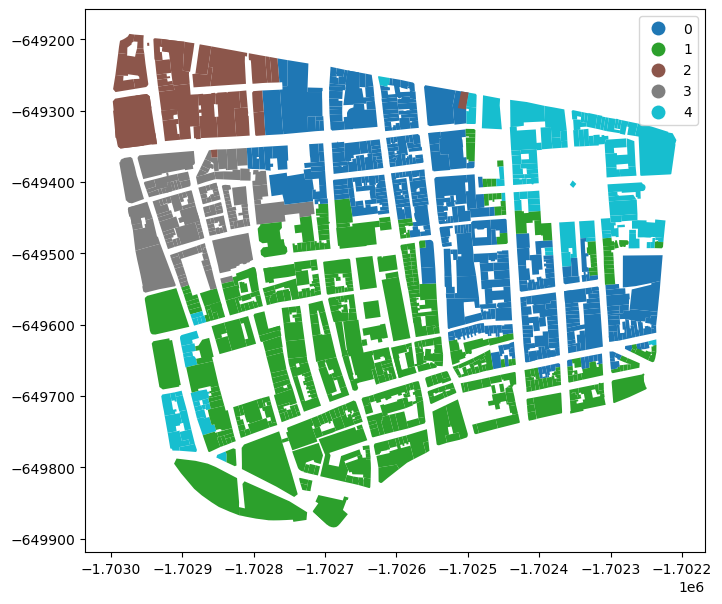

In [34]:
visualizer.plot_urban_types()

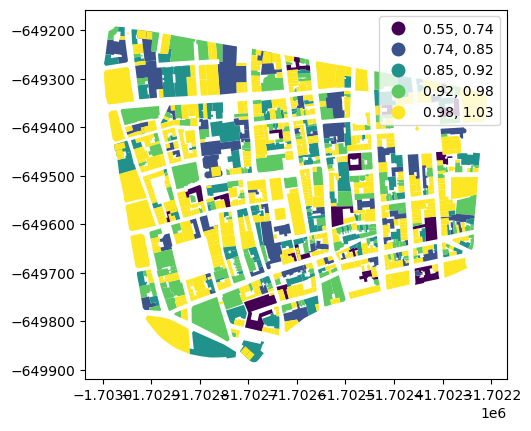

In [35]:
visualizer.plot_eri()

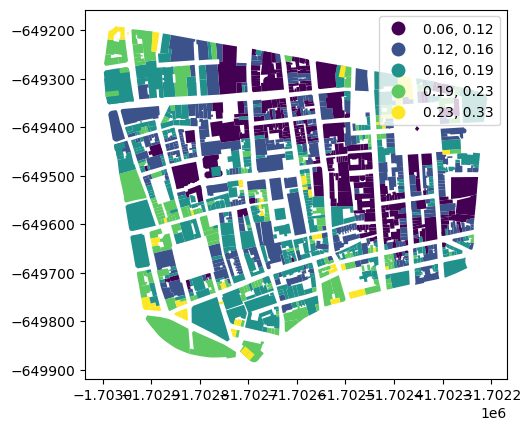

In [36]:
visualizer.plot_adjacency()

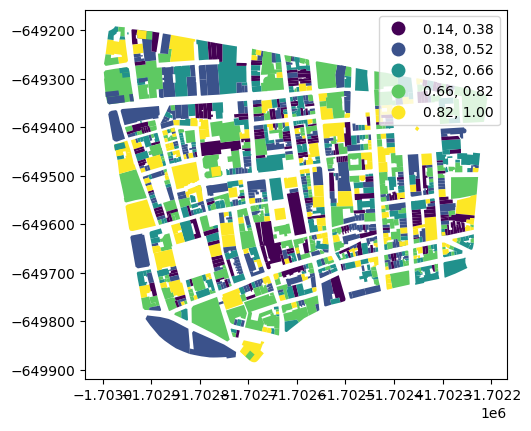

In [37]:
visualizer.plot_elongation()

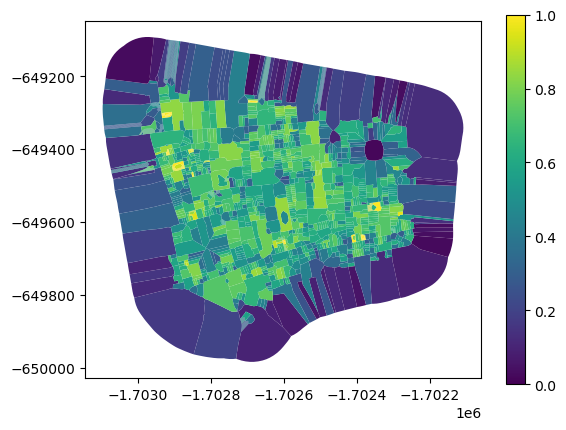

In [38]:
visualizer.plot_tessellations_car()